# __Uitgangspunten bij opstellen/gebruik Binder Notebook:__


---



1. Aangeleverde export vanuit TBS is __ALTIJD__ in .csv format en is __ALTIJD__ _'tab seperated_';
2. Totaaloverzicht waaraan de .csv export als nieuwe tab toegevoegd moet worden is __ALTIJD__ in .xlsx format;
3. Er wordt __ALTIJD__ maar één .csv export tegelijk in de omgeving ingeladen;
4. Het totaaloverzicht en de exports zijn altijd conform format welke is aangeleverd door Piet Bon d.d. 17-12-2020;
5. Er zijn geen andere bestanden geeimporteerd in de virtuele Binder omgeving.

---






# Download alle ontbrekende Python packages voor de Binder omgeving zodat deze geïmporteerd en gebruikt kunnen worden.

In [ ]:
# !pip3 install pandas
# !pip3 install openpyxl

# Importeer de benodige Python packages om het script te kunnen runnen.

In [ ]:
import os
import pandas as pd
from openpyxl import load_workbook

# Maak 2 nieuwe variabelen aan: __format_export__ en __format_overzicht__ aan en geef per variabale in stringformat het bestandsformat aan _(bijvoorbeeld .csv of .xlsx)_.

In [ ]:
format_export = '.csv'
format_overzicht = '.xlsx'

# Definieer de functie `haal_bestand_op(bestandstype)`

## Pre-conditie:
1. Maak de huidige werkmap inzichtelijk door de bestaande functie  `os.getcwd()` te runnen en het resultaat op te slaan in variabele: __cwd__;
2. Gebruikt de bestaande functie `os.listdir()` met als inputvariabele __cwd__ om een lijst te maken van alle bestanden in deze werkmap en voegt dit samen in variabele (lijst) __bestanden__.

# De functie doorloopt de volgende stappen:
1. Gebruikt een _for_ loop om over deze lijst heen te itereren en combineer het PATH van de werkmap met de bestandsnaam;
2. Geeft als eindresultaat de variabele __path__ terug met daarin het absolute PATH naar het bestand.

In [ ]:
cwd = os.getcwd()
bestanden = os.listdir(cwd)

In [ ]:
def haal_bestand_op(bestandstype):
  for bestand in bestanden:
    if bestand.endswith(bestandstype):
      path = (f'{cwd}/{bestand}')
      return path

# Run de functie `haal_bestand_op(bestandstype)` met als inputvariabele bestandstype: __format_export__ en sla het resultaat op als variabele __path__.

In [ ]:
path = haal_bestand_op(format_export)
path

'/content/CT_Sommatie_20201217_110913.csv'

# Laad de .csv in een nieuw DataFrame: __df__ en print de eerste 5 regels met de bestaande functie `df.head()`om het resultaat in te zien en/of te controleren.

In [ ]:
df = pd.read_csv(path, sep='\t')
df.head()

,aantal,scadatekst,tagnaam,jaar,maand,locatie,tunneldeel,deelinstallatie,typeobject,objectnaam,instantienaam,BPScode,soortmelding,Unnamed: 13
0,88,Overdruk pompruimten en kelders: Geen overdruk...,CTW_TUN_BnB_adpKLDovdk.Meldingen.OverdrukNietOK,2020,11,CTW,TUN,BnB,ADP,KLDovdk,NaN,NaN,VT,NaN
1,26,VRI Noord: Fout tijdens activeren rood,CTW_B2_BnB_adpVRIafhNZ.Meldingen.ACOF_Rood,2020,11,CTW,B2,BnB,ADP,VRIafh,NZ,"A10n-30,7",VT,NaN
2,16,HF: Niet beschikbaar,CTO_B1_BnB_adpHFbesch.Meldingen.NietBeschikbaar,2020,11,CTO,B1,BnB,ADP,HFbesch,NaN,NaN,VT,NaN
3,16,MTM Inleidende snelheid ZN: Niet beschikbaar,CTO_B1_BnB_adpMTMsmrZN.Meldingen.NietBeschikbaar,2020,11,CTO,B1,BnB,ADP,MTMsmr,ZN,NaN,VT,NaN
4,16,HF: Niet beschikbaar,CTW_B1_BnB_adpHFbesch.Meldingen.NietBeschikbaar,2020,11,CTW,B1,BnB,ADP,HFbesch,NaN,NaN,VT,NaN


# Gebruik onderstaande voorbeeld als gewenst resultaat voor het DataFrame:

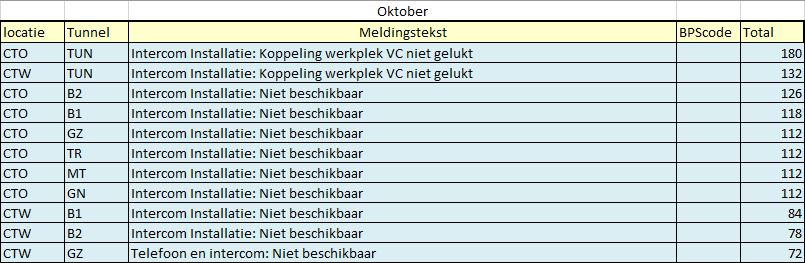

## Stappen:
1. Verwijder de overbodige kolommen;
2. Pas de kolomnamen aan conform bovenstaand voorbeeld;
3. Print de eerste 5 resultaten met `df.head()` om het resultaat in te zien en/of te controleren.

In [ ]:
df2 = df[['locatie', 'tunneldeel', 'scadatekst', 'BPScode', 'aantal']]
df2.rename(columns={'locatie':'locatie', 'tunneldeel':'Tunnel', 'scadatekst':'Meldingstekst', 'BPScode':'BPScode', 'aantal':'Total'}, inplace=True)
df2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,locatie,Tunnel,Meldingstekst,BPScode,Total
0,CTW,TUN,Overdruk pompruimten en kelders: Geen overdruk...,NaN,88
1,CTW,B2,VRI Noord: Fout tijdens activeren rood,"A10n-30,7",26
2,CTO,B1,HF: Niet beschikbaar,NaN,16
3,CTO,B1,MTM Inleidende snelheid ZN: Niet beschikbaar,NaN,16
4,CTW,B1,HF: Niet beschikbaar,NaN,16


# Haal de maand van de export uit het eerste DataFrame het nummer van de maand op en sla deze op als nieuwe variabele: __maand_nr__.

In [ ]:
maand_nr = str(df['maand'][1])
maand_nr

'11'

# Maak een dictonary: __dict_mont__ met daarin alle maanden en hun nummers, deze zal als input dienen voor de tab naam in het totaalbestand.

In [ ]:
dict_month = {'1':'januari',
              '2':'februari',
              '3':'maart',
              '4':'april',
              '5':'mei',
              '6':'juni',
              '7':'juli',
              '8':'augustus',
              '9':'september',
              '10':'oktober',
              '11':'november',
              '12':'december'}

# Zoek op basis van __maand_nr__ de bijhorende naam van de maand op en sla deze op in variabele __maand_naam__.

In [ ]:
tabnaam = dict_month.get(maand_nr)
tabnaam

'november'

# Run de functie `haal_bestand_op(bestandstype)` met als inputvariabele bestandstype: __format_overzicht__ en sla het resultaat op als variabele __bestandsnaam__.

In [ ]:
bestandsnaam = haal_bestand_op(format_overzicht)
bestandsnaam

'/content/logging Coentunnel.xlsx'

# Definieer de functie `voeg_dataframe_toe_aan_spreadsheet(bestandsnaam, tabnaam, dataframe)`

Deze functie pakt het eerder samengestelde dataframe: __df2__ en voeg deze als nieuwe tab achteraan in de spreadsheet toe met als naam de naam van de maand uit variabele: __maand_naam__.

In [ ]:
def voeg_dataframe_toe_aan_spreadsheet(bestandsnaam, tabnaam, dataframe):
    """
    Voegt een DataFrame toe als nieuwe tab in een bestaand spreadsheet
    :parameter bestandsnaam: naam of path van het bestand
    :parameter tabname: tabnaam die aangemaakt moet worden
    :parameter dataframe: dataframe dat toegevoegd dient te worden
    """
    filename = bestandsnaam
    sheet_name = tabnaam

    # creer een Excelwriter
    writer = pd.ExcelWriter(filename, engine='openpyxl')
    
    try:
        # probeer een bestaand spreadsheet te openen
        print(f'oude filename =  {filename}')
        filename = filename.replace('/', '\\')
        print(f'nieuwe filename = {filename}')
        
        writer.book = load_workbook(filename)
        
        # copieer bestaande tabs
        writer.sheets = dict(
            (ws.title, ws) for ws in writer.book.worksheets)
    except IOError:
        # bestand bestaat niet, maak hem aan
        pass

    # maak de nieuwe tab aan
    dataframe.to_excel(writer, sheet_name=sheet_name)
    
    # sla de nieuwe spreadsheet op
    writer.save()

# Run de functie `voeg_dataframe_toe_aan_spreadsheet()`

In [ ]:
voeg_dataframe_toe_aan_spreadsheet(bestandsnaam, tabnaam, df2)

# Download het nieuwe totaaloverzicht en sla deze lokaal op je laptop op, na het sluiten van deze notebook zal het bestand verwijderd worden uit de virtuele Binder omgeving.